In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from pbcpy.base import Cell
from pbcpy.grid import Grid

In [3]:
from pbcpy.grid_functions import Grid_Function_Base, Grid_Function, Grid_Function_Reciprocal, Grid_Space

In [4]:
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

# Now we compute Aluminium FCC

In [5]:
# read density file
mol = PP(filepp='Al_fde_rho.pp').read()

#now save it as xsf. Now can open with VESTA
# --> use isosurface cutoff of 0.03
XSF(filexsf='Al_fde_rho.xsf').write(system=mol)

(37, 37, 73) 99937


In [6]:
density = mol.plot

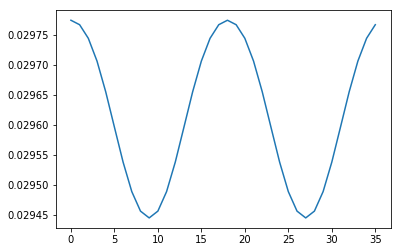

In [7]:
plt.plot(density.values[:,18,36])
plt.show()

In [8]:
grid_real = Grid_Space(density.grid.at,density.grid.nr)
mydens = Grid_Function(grid_real,griddata_3d=density.values)

### Get the FFT of the density. Just for fun.

In [9]:
densG_al = mydens.fft()

### Get the value of G^2 at every grid point. Just for fun!

In [10]:
g2_al=grid_real.reciprocal_grid.dist_values()**2
np.shape(g2_al)

(36, 36, 72)

# Now we compute Silicon CD

In [11]:
# read density file
mol = PP(filepp='Si_fde_rho.pp').read()

#now save it as xsf. Now can open with VESTA
# --> use isosurface cutoff of 0.03
XSF(filexsf='Si_fde_rho.xsf').write(system=mol)

(49, 49, 49) 117649


In [12]:
density = mol.plot

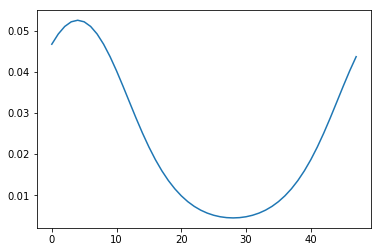

In [13]:
plt.plot(density.values[:,20,20])
plt.show()

In [14]:
grid_real = Grid_Space(density.grid.at,density.grid.nr)
mydens = Grid_Function(grid_real,griddata_3d=density.values)

In [15]:
densG_si = mydens.fft()

In [16]:
g2_si=grid_real.reciprocal_grid.dist_values()**2
np.shape(g2_si)

(48, 48, 48)

# Now we compute Silicon FCC

In [17]:
# read density file
mol = PP(filepp='Si_FCC_fde_rho.pp').read()

#now save it as xsf. Now can open with VESTA
# --> use isosurface cutoff of 0.03
XSF(filexsf='Si_FCC_fde_rho.xsf').write(system=mol)

(31, 31, 31) 29791


In [18]:
density = mol.plot

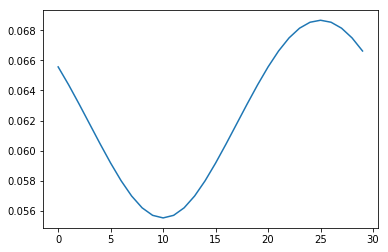

In [19]:
plt.plot(density.values[:,20,20])
plt.show()

In [20]:
grid_real = Grid_Space(density.grid.at,density.grid.nr)
mydens = Grid_Function(grid_real,griddata_3d=density.values)

In [21]:
densG_si_fcc = mydens.fft()

In [22]:
g2_si_fcc=grid_real.reciprocal_grid.dist_values()**2
np.shape(g2_si_fcc)

(30, 30, 30)

# Compute TF potential: $v_{TF}\propto \big[\rho(\mathbf{r})\big]^{\frac{2}{3}}$

In [23]:
pot = Grid_Function(mydens)

In [24]:
pot.values = mydens.values.copy()**(2/3)

# "Learn" (or fit) potential using density as descriptor

In [25]:
np.shape(pot.values)

(30, 30, 30)

In [26]:
X = np.reshape(mydens.values,(np.shape(mydens.values)[0]*np.shape(mydens.values)[1]*np.shape(mydens.values)[2],))
Y = np.reshape(pot.values,(np.shape(pot.values)[0]*np.shape(pot.values)[1]*np.shape(pot.values)[2],))

In [27]:
indx=np.argsort(X)
X=X[indx]
Y=Y[indx]

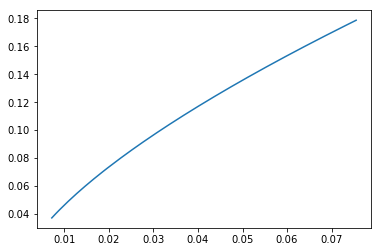

In [28]:
plt.plot(X,Y)
plt.show()

In [29]:
# must reshape due to a glitch in sklearn
X=np.reshape(X,(np.shape(X)[0],1))
Y=np.reshape(Y,(np.shape(Y)[0],1))

In [30]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
model.score(X,Y)

0.99445139669894145

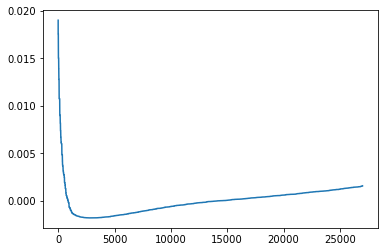

In [32]:
plt.plot(model.predict(X)-Y)
plt.show()